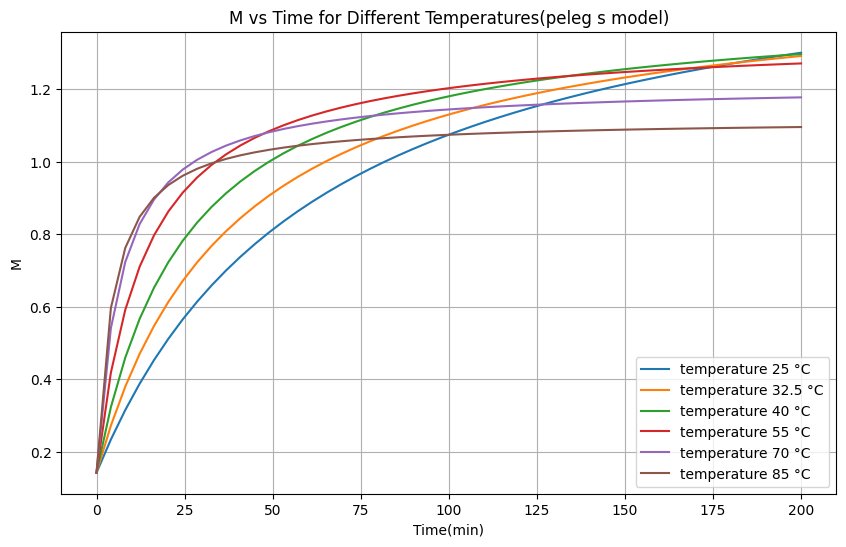

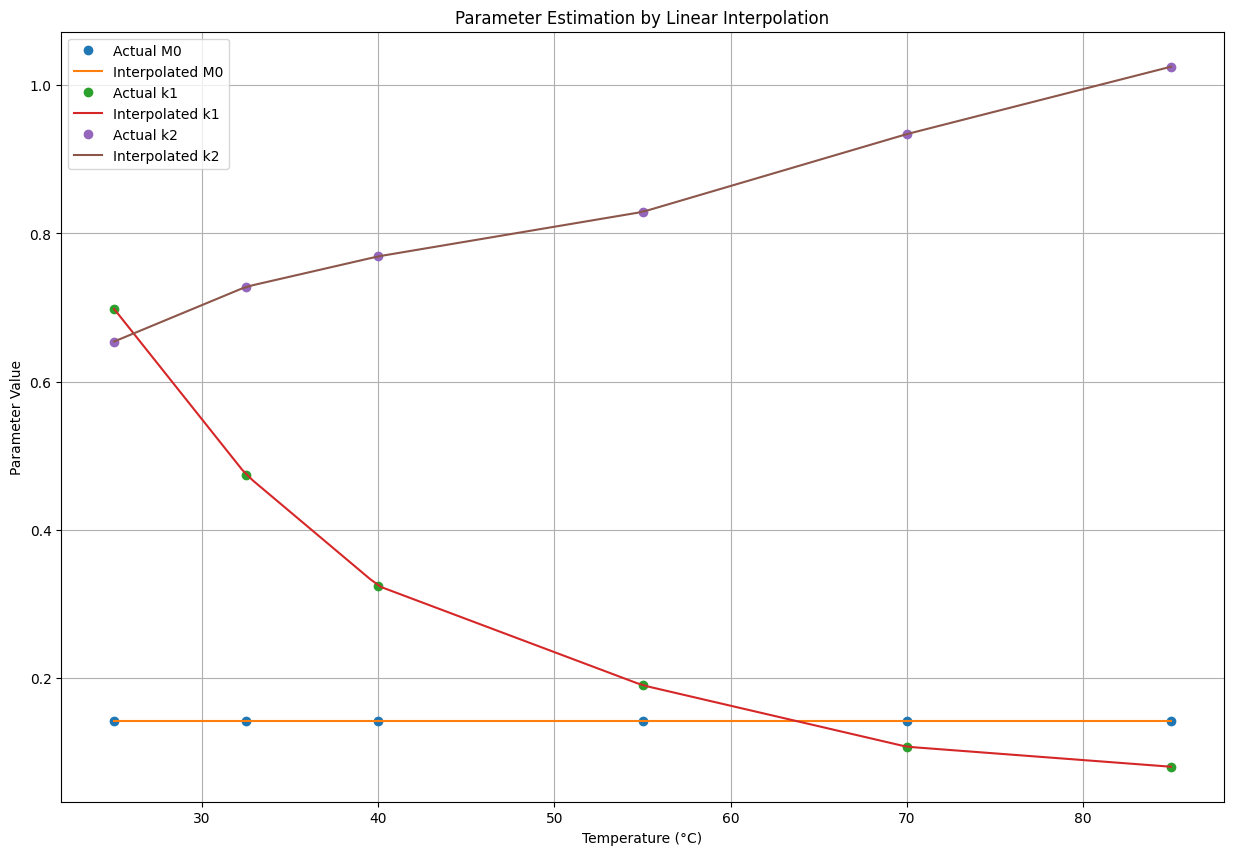

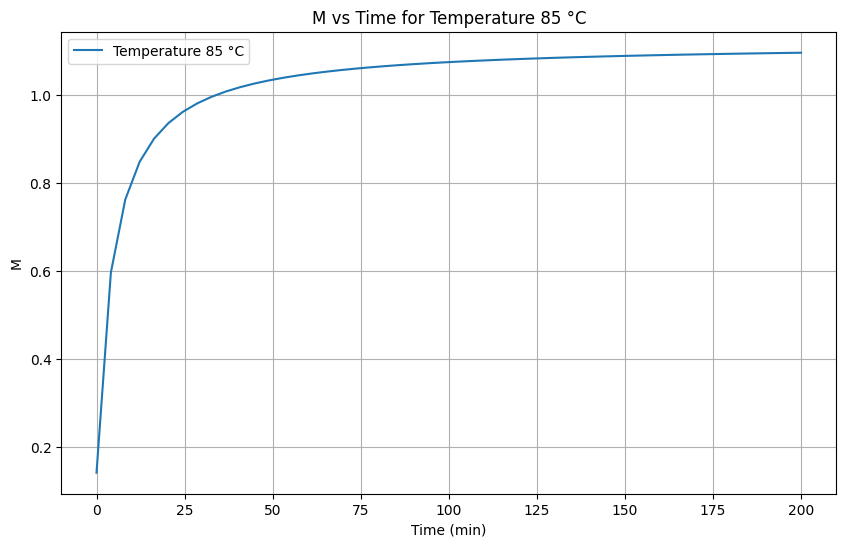

Parameter values for temperature 85 °C:
M0: 0.142
k1: 0.08
k2: 1.025


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

def M(t,M0,k1,k2):
    return M0 + t/(k1 + k2*t )

'''
peleg's model 

This model is one of the suitable for hydration data, but it
cannot describe an initial lag phase, which is observed during
the hydration of some dried grains.
'''

temperatures = [25, 32.5, 40, 55, 70, 85]

parametres = {
    25 : (0.142,0.698,0.654),
    32.5 :(0.142,0.474,0.728),
    40:(0.142,0.324,0.769),
    55:(0.142,0.190,0.829),
    70:(0.142,0.107,0.934),
    85:(0.142,0.080,1.025),
    }

plt.figure(figsize=(10,6))

for temp in temperatures:
    M0,k1,k2=parametres[temp]
    t=np.linspace(0, 200)
    plt.plot(t, M(t,M0,k1*60,k2) , label=f'temperature {temp} °C')

plt.title('M vs Time for Different Temperatures(peleg s model)')
plt.xlabel('Time(min)')
plt.ylabel('M')
plt.legend()
plt.grid(True)
plt.show()
'''
######################### nonlinear regression

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for temperatures
temperatures = np.array([25, 32.5, 40, 55, 70, 85])
parameters = np.array([
    (0.142, 0.698, 0.654),
    (0.142, 0.474, 0.728),
    (0.142, 0.324, 0.769),
    (0.142, 0.190, 0.829),
    (0.142, 0.107, 0.934),
    (0.142, 0.080, 1.025),
])

# Perform nonlinear regression for each parameter
interpolated_parameters = {}
for i in range(parameters.shape[1]):
    popt, _ = curve_fit(M, temperatures, parameters[:, i])
    interpolated_parameters[i] = popt

def estimate_parameters(temperature):
    estimated_params = []
    for i in range(parameters.shape[1]):
        estimated_params.append(M(temperature, *interpolated_parameters[i]))
    return estimated_params

# Plotting
plt.figure(figsize=(10, 6))

for i, param_name in enumerate(['M0', 'k1', 'k2']):
    plt.plot(temperatures, parameters[:, i], 'o', label=f'Actual {param_name}')
    plt.plot(temperatures, M(temperatures, *interpolated_parameters[i]), label=f'Fitted {param_name}')

plt.title('Parameter Estimation by Nonlinear Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)
plt.show()

# Example usage of the function to estimate parameters for a given temperature
temperature_to_estimate = 40
estimated_params = estimate_parameters(temperature_to_estimate)
print(f"Estimated parameter values for temperature {temperature_to_estimate}°C:", estimated_params)
'''
############################ linear interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for temperatures
temperatures = [25, 32.5, 40, 55, 70, 85]
parameters = {
    25: (0.142, 0.698, 0.654),
    32.5: (0.142, 0.474, 0.728),
    40: (0.142, 0.324, 0.769),
    55: (0.142, 0.190, 0.829),
    70: (0.142, 0.107, 0.934),
    85: (0.142, 0.080, 1.025),
}

# Function to perform linear interpolation for a specific temperature
def interpolate_parameters(temp):
    interpolated_params = {}
    for i in range(len(temperatures) - 1):
        temp1, temp2 = temperatures[i], temperatures[i + 1]
        if temp1 <= temp <= temp2:
            M0_interp = interp1d([temp1, temp2], [parameters[temp1][0], parameters[temp2][0]], kind='linear')
            k1_interp = interp1d([temp1, temp2], [parameters[temp1][1], parameters[temp2][1]], kind='linear')  # Convert hours to minutes
            k2_interp = interp1d([temp1, temp2], [parameters[temp1][2], parameters[temp2][2]], kind='linear')
            M0 = M0_interp(temp)
            k1 = k1_interp(temp)  # No need to convert again
            k2 = k2_interp(temp)
            interpolated_params[temp] = (M0, k1, k2)
            break
    return interpolated_params
# Function to get interpolated parameters for a range of temperatures
def get_interpolated_parameters(temp_range):
    interpolated_params = []
    for temp in temp_range:
        params = interpolate_parameters(temp)
        if params:
            interpolated_params.append(params[temp])
        else:
            interpolated_params.append((np.nan, np.nan, np.nan))  # Handle out of range temperatures
    return interpolated_params

# Define a range of temperatures for interpolation
temp_range = np.linspace(25, 85, 100)
interpolated_params = get_interpolated_parameters(temp_range)
interpolated_params = np.array(interpolated_params)

# Plotting the parameters
plt.figure(figsize=(15, 10))

param_names = ['M0', 'k1', 'k2']
for i, param_name in enumerate(param_names):
    plt.plot(temperatures, [parameters[temp][i] for temp in temperatures], 'o', label=f'Actual {param_name}')
    plt.plot(temp_range, interpolated_params[:, i], label=f'Interpolated {param_name}')

plt.title('Parameter Estimation by Linear Interpolation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)
plt.show()
# Function to plot M vs Time for a specific temperature
def plot_temperature(temp):
    plt.figure(figsize=(10, 6))
    M0, k1, k2 = interpolate_parameters(temp)[temp]
    t = np.linspace(0, 200)
    plt.plot(t, M(t, M0, k1*60, k2), label=f'Temperature {temp} °C')
    plt.title(f'M vs Time for Temperature {temp} °C')
    plt.xlabel('Time (min)')
    plt.ylabel('M')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to get parameter values for a specific temperature
def get_parameter_values(temp):
    M0, k1, k2 = interpolate_parameters(temp)[temp]
    print(f"Parameter values for temperature {temp} °C:")
    print(f"M0: {M0}")
    print(f"k1: {k1}")
    print(f"k2: {k2}")

# Example usage
chosen_temp = 85
plot_temperature(chosen_temp)
get_parameter_values(chosen_temp)